# Цели и задачи проекта

Необходимо исследовать и проанализировать данные обучения студентов Open University - одного из крупнейших университетов дистанционного образования в мире.<br>
В ходе анализа нужно получить ответы на следующие вопросы:<br>
<ol>
<li>Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).</li><br>
<li>Выявить самый сложный и самый простой экзамен: найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью.</li><br>
<li>По каждому предмету определить средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).</li><br>
<li>Выявить самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).</li><br>
<li>В период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.</li><br>
<li>Для качественного анализа аудитории, используя подходы, основанные на сегментации, построить адаптированные RFM-кластеры студентов,<br>
В адаптированной кластеризации нужно выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов,<br>
M - среднее количество баллов, получаемое за экзамен.</li>
</ol>

---

# Описание файлов данных

<b>assessments.csv</b> — файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками,<br>
за которыми следует заключительный экзаменационный тест (экзамен).<br>
описание полей:<br>
<i>code_module</i> — идентификационный код предмета.<br>
<i>code_presentation</i> — семестр (Идентификационный код).<br>
<i>id_assessment</i> — тест (Идентификационный номер ассессмента).<br>
<i>assessment_type</i> — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).<br>
<i>date</i> — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).<br>
<i>weight</i> — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.<br>
<br>
<b>courses.csv</b> — файл содержит список предметов по семестрам.<br>
описание полей:<br>
<i>code_module</i> — предмет (идентификационный код).<br>
<i>code_presentation</i> — семестр (идентификационный код).<br>
<i>module_presentation_length</i> — продолжительность семестра в днях.<br>
<br>
<b>studentAssessment.csv</b> — файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.<br>
описание полей:<br>
<i>id_assessment</i> — тест (идентификационный номер).<br>
<i>id_student</i> — идентификационный номер студента.<br>
<i>date_submitted</i> — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.<br>
<i>is_banked</i> — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).<br>
<i>score</i> — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.<br>
<br>
<b>studentRegistration.csv</b> — файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.<br>
описание полей:<br>
<i>code_module</i> — предмет (идентификационный код).<br>
<i>code_presentation</i> — семестр (идентификационный код)<br>
<i>id_student</i> — идентификационный номер студента.<br>
<i>date_registration</i> — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает,<br>
что студент зарегистрировался на прохождение курса за 30 дней до его начала).<br>
date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

# Загрузка файлов и библиотек

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'https://getfile.dokpub.com/yandex/get/'
df_asss = pd.read_csv(f'{path}https://disk.yandex.ru/d/CdlDt6rwYuIwRw')
df_crss = pd.read_csv(f'{path}https://disk.yandex.ru/d/LfIt_BTKbH9jcw')
df_stas = pd.read_csv(f'{path}https://disk.yandex.ru/d/TT_rbMzeN3E9pQ')
df_strg = pd.read_csv(f'{path}https://disk.yandex.ru/d/R42IZhwrfMciMQ')

In [3]:
print('размерность таблиц           колонок строк')
print(f'файл assessments.csv            {df_asss.shape[1]}    {df_asss.shape[0]}')
print(f'файл courses.csv                {df_crss.shape[1]}    {df_crss.shape[0]}')
print(f'файл studentAssessment.csv      {df_stas.shape[1]}    {df_stas.shape[0]}')
print(f'файл studentRegistration.csv    {df_strg.shape[1]}    {df_strg.shape[0]}')

размерность таблиц           колонок строк
файл assessments.csv            6    206
файл courses.csv                3    22
файл studentAssessment.csv      5    173912
файл studentRegistration.csv    5    32593


# Exploratory data analysis

Данные о курсах

In [4]:
df_crss

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


code_presentation - код семестра. Код состоит из года и буквы месяца начала,
месяцы маркируются от A начиная с января, соответственно B - зимний семестр, начало в феврале, буква J - осенний семестр, начало в октябре

Здесь ничего необычного. Можем развернуть таблицу и посмотреть на некое подобие расписания.

In [5]:
df_crss.pivot(index='code_module', columns='code_presentation', values='module_presentation_length').fillna('')

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,,268.0,,269.0
BBB,240.0,268.0,234.0,262.0
CCC,,,241.0,269.0
DDD,240.0,261.0,241.0,262.0
EEE,,268.0,241.0,269.0
FFF,240.0,268.0,241.0,269.0
GGG,,261.0,241.0,269.0


Данные об испытаниях

In [6]:
df_asss.head(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [7]:
df_asss.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

7 уникальных курсов(предметов),
4 семестра,
206 уникальных испытаний с 3 типами оценок,
также есть дата испытания и вес данного испытания

In [8]:
print('семестры ', *sorted(list(df_asss.code_presentation.unique())))
print('типы оценок ', *list(df_asss.assessment_type.unique()))
print('список предметов ', *list(df_asss.code_module.unique()))

семестры  2013B 2013J 2014B 2014J
типы оценок  TMA Exam CMA
список предметов  AAA BBB CCC DDD EEE FFF GGG


типы оценок:
TMA - Tutor Marked Assessment оценка учителем,
CMA - Computer Marked Assessment компьютерный тест,
Exam - экзамен

посмотрим на испытания типа Exam 

In [9]:
df_exam = df_asss.loc[df_asss.assessment_type == 'Exam']

In [10]:
df_exam

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [11]:
df_exam.shape

(24, 6)

итого 24 экзамена

Теперь посмотрим на данные по успеваемости студентов

In [12]:
df_stas

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [13]:
print(f'данные по {df_stas.id_student.nunique()} уникальных студентов')

данные по 23369 уникальных студентов


Чтобы картина стала более полной, объединим датафреймы df_stas и df_asss по полю id_assessment

In [14]:
df_stun = df_stas.merge(df_asss, on='id_assessment')

In [15]:
df_stun

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


теперь видно испытания по какому предмету сдавал студент, в каком семестре и когда именно,
нас интересуют только экзамены, отфильтруем их в новый датафрэйм

In [16]:
df_stex = df_stun.loc[df_stun.assessment_type == 'Exam']

In [17]:
df_stex

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0
95983,25368,653051,242,0,27.0,DDD,2014J,Exam,NaN,100.0


In [18]:
print(f'всего {df_stex.id_student.nunique()} уникальных студентов')
print(f'сдавали {df_stex.id_assessment.nunique()} уникальных экзаменов')
print(f'по {df_stex.code_module.nunique()} предметам')
print(f'в {df_stex.code_presentation.nunique()} семестрах')

всего 4633 уникальных студентов
сдавали 6 уникальных экзаменов
по 2 предметам
в 4 семестрах


несмотря на то что курсы проходили по 7 предметам, экзамены студенты сдавали только по 2

всего у нас получилось 4959 строк, а уникальных студентов 4633, значит некоторые студенты сдавали экзамены больше 1 раза.

In [19]:
df_stex_temp =df_stex.groupby('id_student') \
    .agg({'code_module': 'count'}) \
    .reset_index() \
    .sort_values('id_student') \
    .query('code_module > 1') \
    .rename(columns={'code_module' : 'ex_counts'})

In [20]:
df_stex_temp

,id_student,ex_counts
72,80329,2
74,80868,2
102,105523,2
122,123598,2
125,126394,2
...,...,...
4467,2498388,2
4546,2609908,2
4561,2622441,2
4571,2639310,2


326 студентов сдавали больше 1 экзамена, точнее 2, сохраним список этих студентов и отберем их

In [21]:
st_list_exover2 = list(df_stex_temp.id_student)
df_stexover2 = df_stex.query('id_student in @st_list_exover2').sort_values('id_student')
df_stexover2

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
64829,24299,80329,244,0,60.0,CCC,2014J,Exam,NaN,100.0
95398,25368,80329,243,0,84.0,DDD,2014J,Exam,NaN,100.0
64830,24299,80868,244,0,70.0,CCC,2014J,Exam,NaN,100.0
83033,25354,80868,237,0,58.0,DDD,2013J,Exam,261.0,100.0
53384,24290,105523,236,0,60.0,CCC,2014B,Exam,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...
64806,24299,2622441,243,0,58.0,CCC,2014J,Exam,NaN,100.0
53362,24290,2639310,230,0,74.0,CCC,2014B,Exam,NaN,100.0
83002,25354,2639310,241,0,76.0,DDD,2013J,Exam,261.0,100.0
83011,25354,2686578,242,0,96.0,DDD,2013J,Exam,261.0,100.0


студенты сдававшие 2 экзамена в разных семестрах

In [22]:
df_stexover2.groupby(['id_student']) \
    .agg({'code_presentation': 'nunique'}) \
    .query('code_presentation > 1') \
    .count()

code_presentation    266
dtype: int64

таких 266 человек

студенты сдававшие 2 экзамена в одном семестре

In [23]:
df_stexover2.groupby(['id_student', 'code_presentation']) \
    .agg({'code_module': 'nunique'}) \
    .query('code_module > 1') \
    .count()

code_module    60
dtype: int64

60 человек. Все сходится, 60 + 266 = 326

студенты сдававшие разные предметы

In [24]:
df_stexover2.groupby('id_student') \
    .agg({'code_module': 'nunique'}) \
    .query('code_module > 1') \
    .count()

code_module    322
dtype: int64

322 человека, то есть были те, кто сдавал 1 предмет 2 раза, найдем их

проверяем предмет CCC

In [25]:
df_stexover2.query('code_module == "CCC"') \
    .groupby('id_student') \
    .agg({'code_module': 'count'}) \
    .sort_values('code_module', ascending=False) \
    .head(5)

,code_module
id_student,
80329,1
629405,1
617781,1
616870,1
616658,1


а теперь DDD

In [26]:
df_stexover2.query('code_module == "DDD"') \
    .groupby('id_student') \
    .agg({'code_module': 'count'}) \
    .sort_values('code_module', ascending=False) \
    .head(5)

,code_module
id_student,
540758,2
605118,2
527323,2
593903,2
80329,1


вот они эти студенты

In [27]:
list_st_exover2DDD = list(df_stexover2.query('code_module == "DDD"') \
        .groupby('id_student') \
        .agg({'code_module': 'count'}) \
        .query('code_module > 1') \
        .index)
list_st_exover2DDD

[527323, 540758, 593903, 605118]

посмотрим на них 

In [28]:
df_stexover2.query('id_student in @list_st_exover2DDD')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
69928,25340,527323,229,0,24.0,DDD,2013B,Exam,240.0,100.0
87566,25361,527323,234,0,18.0,DDD,2014B,Exam,241.0,100.0
69983,25340,540758,229,0,40.0,DDD,2013B,Exam,240.0,100.0
87573,25361,540758,234,0,60.0,DDD,2014B,Exam,241.0,100.0
95711,25368,593903,243,0,44.0,DDD,2014J,Exam,NaN,100.0
82731,25354,593903,241,0,49.0,DDD,2013J,Exam,261.0,100.0
95749,25368,605118,243,0,64.0,DDD,2014J,Exam,NaN,100.0
82844,25354,605118,237,0,42.0,DDD,2013J,Exam,261.0,100.0


4 человека сдавали курс(предмет) DDD 2 раза. Первый так и не сдал

и наконец посмотрим на последний файл, studentregistration

In [29]:
df_strg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [30]:
print(f'уникальных студентов регистрировавшихся на курс(ы) {df_strg.id_student.nunique()}')

уникальных студентов регистрировавшихся на курс(ы) 28785


предметы по количеству регистраций на них

In [31]:
df_strg.groupby('code_module') \
    .agg({'id_student': 'nunique'}) \
    .sort_values('id_student', ascending=False).head(5)

,id_student
code_module,
BBB,7692
FFF,7397
DDD,5848
CCC,4251
EEE,2859


то же по семестрам

In [32]:
df_strg.groupby('code_presentation') \
    .agg({'id_student': 'nunique'}) \
    .sort_values('id_student', ascending=False).head(5)

,id_student
code_presentation,
2014J,10670
2013J,8830
2014B,7333
2013B,4679


посмотрим на распределение даты регистрации

<AxesSubplot: >

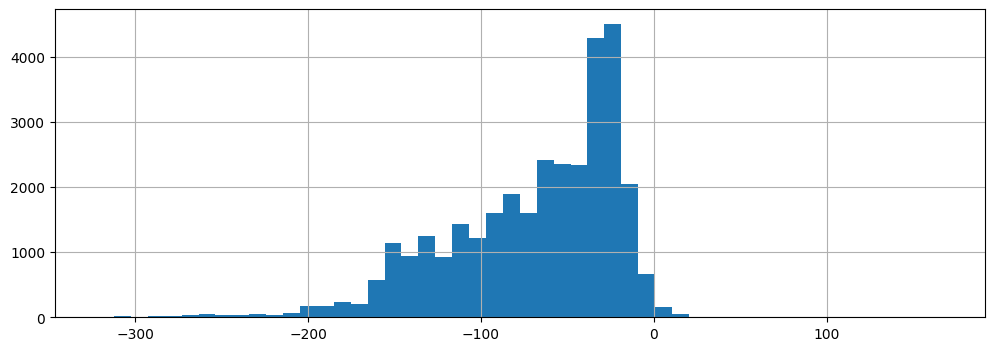

In [33]:
plt.figure(figsize = (12,4))
df_strg.date_registration.hist(bins=50)

основная масса студентов регистрировалась заранее, некоторые почти за год,
но были и такие кто заходил на курс уже когда он шел.

In [34]:
t1 = df_strg.query('date_registration > 0').shape[0]
t2 = df_strg.query('date_registration > 0').query('date_unregistration > 0').shape[0]
print(f'зарегистрировались на курс когда он уже шел {t1} студента из них снялось с курса {t2}')

зарегистрировались на курс когда он уже шел 234 студента из них снялось с курса 47


# Ответы на вопросы

## 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).

Курс здесь это не как в вузах РФ год обучения, 1, 2, 3 и т.д., курсом в OU считается предмет (code_module), курс считается завершенным если экзамен по нему успешно сдан (score не меньше 40)

добавим колонку exam_passing, если score >= 40 то exam_passing = 1 иначе 0

In [35]:
df_stex['exam_passing'] = df_stex.score.apply(lambda x: 1 if x >= 40 else 0)

In [36]:
df_stex

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,exam_passing
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,1
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,1
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,1
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0,1
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0,1
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0,1
95983,25368,653051,242,0,27.0,DDD,2014J,Exam,NaN,100.0,0


нас интересуют уникальные студенты сдавшие 1 курс, 
сгруппируем по студентам и посчитаем общее количество экзаменов, ну и посчитаем студентов по группам

In [37]:
df_stex.groupby('id_student') \
    .agg({'exam_passing': 'sum'}) \
    .exam_passing.value_counts()

1    3802
0     536
2     295
Name: exam_passing, dtype: int64

за весь период наблюдения 3802 студента сдали 1 курс,
295 студентов сдали 2 курса,
536 не сдали ни одного

## 2. Выявить самый сложный и самый простой экзамен: найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.<br>
*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен   

Как выше было показано, у нас 6 экзаменов по 2 предметам

посчитаем завершаемость по экзаменам

In [38]:
ex_goodfinal = df_stex.groupby(['id_assessment', 'exam_passing']) \
    .agg({'id_student': 'count'}) \
    .reset_index() \
    .pivot(index='id_assessment', columns='exam_passing', values='id_student') \
    .reset_index() \
    .rename(columns={0: 'not_pass', 1: 'pass'})

In [39]:
ex_goodfinal

exam_passing,id_assessment,not_pass,pass
0,24290,83,664
1,24299,149,1019
2,25340,98,504
3,25354,90,878
4,25361,39,485
5,25368,108,842


In [40]:
ex_goodfinal['total'] = ex_goodfinal['pass'] + ex_goodfinal['not_pass']
ex_goodfinal['good_final'] = (ex_goodfinal['pass'] / ex_goodfinal['total']).round(2)
ex_goodfinal.sort_values('good_final')

exam_passing,id_assessment,not_pass,pass,total,good_final
2,25340,98,504,602,0.84
1,24299,149,1019,1168,0.87
0,24290,83,664,747,0.89
5,25368,108,842,950,0.89
3,25354,90,878,968,0.91
4,25361,39,485,524,0.93


экзамен с самой низкой завершаемостью (сложный) это экзамен с номером 25340, предмет DDD в семестре 2013B:

In [41]:
df_asss.query('id_assessment == 25340')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
87,DDD,2013B,25340,Exam,240.0,100.0


но этот же предмет в семестре 2014B - самый легкий:

In [42]:
df_asss.query('id_assessment == 25361')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
101,DDD,2014B,25361,Exam,241.0,100.0


то же самое по курсам

In [43]:
ex_goodfinal2 = df_stex.groupby(['code_module', 'exam_passing']) \
    .agg({'id_student': 'count'}) \
    .reset_index() \
    .pivot(index='code_module', columns='exam_passing', values='id_student') \
    .reset_index() \
    .rename(columns={0: 'not_pass', 1: 'pass'})
ex_goodfinal2['total'] = ex_goodfinal2['pass'] + ex_goodfinal2['not_pass']
ex_goodfinal2['good_final'] = (ex_goodfinal2['pass'] / ex_goodfinal2['total']).round(2)
ex_goodfinal2.sort_values('good_final')

exam_passing,code_module,not_pass,pass,total,good_final
0,CCC,232,1683,1915,0.88
1,DDD,335,2709,3044,0.89


курсы по завершаемости примерно равны

## 3. По каждому предмету определить средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

Этот параметр считается достаточно просто. Отбираем все успешные экзамены и считаем среднее по date_submitted

In [44]:
df_stex.query('exam_passing == 1') \
    .groupby('code_module') \
    .agg({'date_submitted': 'mean'}).round(2)

,date_submitted
code_module,
CCC,239.35
DDD,237.98


максимальные сроки сдачи

In [45]:
df_stex.query('exam_passing == 1') \
    .groupby('code_module') \
    .agg({'date_submitted': 'max'}).round(2)

,date_submitted
code_module,
CCC,285
DDD,279


и минимальные

In [46]:
df_stex.query('exam_passing == 1') \
    .groupby('code_module') \
    .agg({'date_submitted': 'min'}).round(2)

,date_submitted
code_module,
CCC,230
DDD,229


## 4. Выявить самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

сначала посмотрим на данные

In [47]:
df_strg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


проверим на отсутствующие значения

In [50]:
df_strg.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

NaN в колонке date_unregistration означает что регистрацию не отменяли,
а вот NaN в колонке date_registration значит что регистрации не было, посмотрим на эти строки

значения NaN не всегда корректно обрабатываются, заменим их все на строку "n/a"

In [76]:
df_strg = df_strg.fillna('n/a')

In [77]:
df_strg.query('date_registration == "n/a"').sort_values('id_student').head(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
2538,BBB,2013J,57369,n/a,-1.0
22335,FFF,2013B,107955,n/a,-40.0
13135,DDD,2013B,128965,n/a,-24.0
14556,DDD,2013J,250456,n/a,-40.0
26333,FFF,2014B,323688,n/a,-107.0


In [78]:
df_strg.query('date_registration == "n/a"').id_student.count()

45

т.е., были студенты, которые никуда не регистрировались, но регистрацию отменяли, это странно

соединим эти данные с датафрэймом df_stex по полю id_student

In [79]:
df_strg.query('date_registration == "n/a"') \
    .merge(df_stex, on='id_student')

,code_module_x,code_presentation_x,id_student,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,code_module_y,code_presentation_y,assessment_type,date,weight,exam_passing
0,CCC,2014B,394791,n/a,-61.0,24299,245,0,44.0,CCC,2014J,Exam,NaN,100.0,1
1,DDD,2013B,128965,n/a,-24.0,25354,237,0,67.0,DDD,2013J,Exam,261.0,100.0,1


только 2 студента из них реально что-то сдавали, причем регистрировались в одном семестре, а сдавали а другом.
видимо это какие-то переводы, или же просто ошибки в данных, не будем их учитывать

убираем все строчки где нет date_registration

In [80]:
df_strg2 = df_strg.query('date_registration != "n/a"')

количество регистраций по предметам(курсам), ТОП3

In [81]:
df_strg2.groupby('code_module').agg({'id_student': 'count'}).sort_values('id_student', ascending=False).head(3)

,id_student
code_module,
BBB,7900
FFF,7751
DDD,6257


если посчитать уникальных, то цифры другие, то есть некоторые студенты регистрировались на один и тот же курс более 1 раза

In [82]:
df_strg2.groupby('code_module') \
    .agg({'id_student': 'nunique'}) \
    .sort_values('id_student', ascending=False) \
    .rename(columns={'id_student': 'reg_count'}) \
    .reset_index() \
    .head(3)

,code_module,reg_count
0,BBB,7683
1,FFF,7387
2,DDD,5840


Самые популярные курсы - BBB, FFF, DDD

Посчитаем отток. В данном случае это количество снятий с курса / количество регистраций

In [86]:
df_regs = df_strg2.groupby('code_module') \
    .agg({'id_student': 'nunique'}) \
    .reset_index() \
    .rename(columns={'id_student': 'regs'}) \
    .merge(df_strg2.query('date_unregistration != "n/a"') \
            .groupby('code_module') \
            .agg({'id_student': 'nunique'}) \
            .reset_index() \
            .rename(columns={'id_student': 'unregs'}) , on='code_module'       
          )

In [87]:
df_regs['churnrate'] = (df_regs.unregs / df_regs.regs).round(2)

ТОП3 предметов по оттоку (churnrate)

In [88]:
df_regs.sort_values('churnrate', ascending=False).head(3)

,code_module,regs,unregs,churnrate
2,CCC,4244,1851,0.44
3,DDD,5840,2058,0.35
1,BBB,7683,2306,0.30


можно предположить, что некоторые студенты записывались на курс не ради его завершения, а просто чтобы прослушать материал<br>
это объясняет что курсов 7 а сдаваемых экзаменов всего 2

## 5. В период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

завершаемость по семестрам

In [89]:
ex_goodfinal3 = df_stex.groupby(['code_presentation', 'exam_passing']) \
    .agg({'id_student': 'nunique'}) \
    .reset_index() \
    .pivot(index='code_presentation', columns='exam_passing', values='id_student') \
    .reset_index() \
    .rename(columns={0: 'not_pass', 1: 'pass'})
ex_goodfinal3['total'] = ex_goodfinal3['pass'] + ex_goodfinal3['not_pass']
ex_goodfinal3['good_final'] = (ex_goodfinal3['pass'] / ex_goodfinal3['total']).round(2)
ex_goodfinal3.sort_values('good_final')

exam_passing,code_presentation,not_pass,pass,total,good_final
0,2013B,98,504,602,0.84
3,2014J,257,1814,2071,0.88
2,2014B,122,1140,1262,0.90
1,2013J,90,878,968,0.91


самая низкая в семестре 2013B

семестры по сроку сдачи курсов

In [90]:
df_stex.query('exam_passing == 1') \
    .groupby('code_presentation') \
    .agg({'date_submitted': 'mean'}) \
    .round(2) \
    .sort_values('date_submitted')

,date_submitted
code_presentation,
2013B,230.16
2014B,233.00
2013J,239.51
2014J,243.68


самые долгие сроки сдачи в семестре 2014J

## 6. Построение адаптированных RFM кластеров студентов

метрики для RFM анализа:<br>
R - среднее время сдачи одного экзамена,<br>
F - завершаемость курсов,<br>
M - среднее количество баллов, получаемое за экзамен.<br>
<br>
т.е. будем учитывать только студентов которые сдавали экзамены.<br>
Основной источник для этого - датафрэйм df_stex который мы ранее создали

In [92]:
df_stex

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,exam_passing
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,1
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,1
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,1
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0,1
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0,1
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0,1
95983,25368,653051,242,0,27.0,DDD,2014J,Exam,NaN,100.0,0


### R - среднее время сдачи одного экзамена

In [93]:
rfm_r = df_stex.groupby('id_student') \
    .agg({'date_submitted': 'mean'}) \
    .reset_index() \
    .rename(columns={'date_submitted': 'r_score'})

In [94]:
rfm_r.head(5)

,id_student,r_score
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0


распределение параметра r_score имеет достаточно узкий диапазон и несет очень мало информации

<AxesSubplot: >

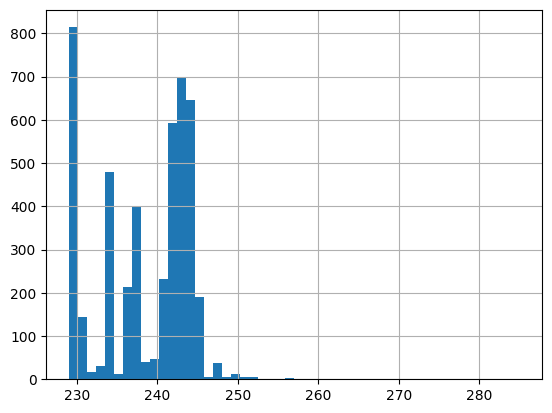

In [95]:
rfm_r.r_score.hist(bins=50)

### F - завершаемость курсов. 

У нас всего 3 варианта метрики "завершаемость" для студента: не сдал ни одного курса, сдал 1, сдал 2.
По сути, это сумма exam_passing для каждого студента.

In [96]:
rfm_f = df_stex.groupby('id_student') \
    .agg({'exam_passing': 'sum'}) \
    .rename(columns={'exam_passing': 'f_score'}) \
    .reset_index()

In [97]:
rfm_f.f_score.value_counts()

1    3802
0     536
2     295
Name: f_score, dtype: int64

### M - среднее количество баллов, получаемое за экзамен

In [98]:
rfm_m = df_stex.groupby('id_student') \
    .agg({'score': 'mean'}) \
    .reset_index() \
    .rename(columns={'score': 'm_score'})

In [99]:
rfm_m.m_score.describe()

count    4633.000000
mean       65.117958
std        20.470561
min         0.000000
25%        50.000000
50%        66.000000
75%        82.000000
max       100.000000
Name: m_score, dtype: float64

Интересно взглянуть на распределение среднего балла.

<AxesSubplot: >

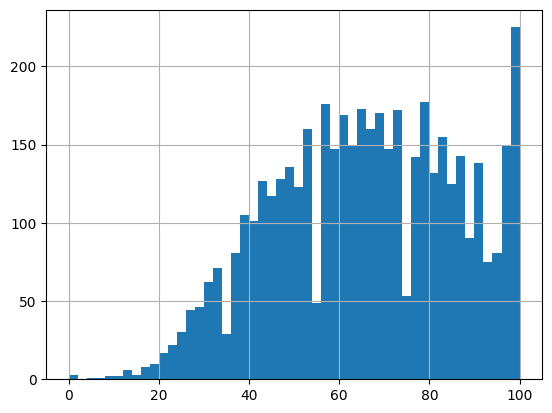

In [100]:
rfm_m.m_score.hist(bins=50)

объединим датафрэймы rfm_r, rfm_f и rfm_m по полю id_student

In [101]:
df_rfm = rfm_r.merge(rfm_f.merge(rfm_m, on='id_student'), on='id_student')

In [102]:
df_rfm

,id_student,r_score,f_score,m_score
0,23698,243.0,1,80.0
1,24213,236.0,1,58.0
2,27116,243.0,1,96.0
3,28046,237.0,1,40.0
4,28787,243.0,1,44.0
...,...,...,...,...
4628,2694886,236.0,1,69.0
4629,2694933,230.0,1,73.0
4630,2695608,237.0,1,73.0
4631,2697181,230.0,1,80.0


### Формирование кластеров

посчитаем квантили для r_score и m_score

In [103]:
print(f'квантили для r_score \n{df_rfm.r_score.quantile(q=[0.2, 0.4, 0.6, 0.8])}')

квантили для r_score 
0.2    231.0
0.4    237.0
0.6    242.0
0.8    243.5
Name: r_score, dtype: float64


границы диапазонов: 231, 237, 242, 243.5

In [104]:
print(f'квантили для m_score \n{df_rfm.m_score.quantile(q=[0.2, 0.4, 0.6, 0.8])}')

квантили для m_score 
0.2    46.2
0.4    60.0
0.6    72.0
0.8    84.0
Name: m_score, dtype: float64


для m_score логично первый порог взять 40 - порог сдачи экзамена, 84 будем считать отличным результатом
остальных разделим пополам, итоговые границы: 40, 62, 84

проставим оценки от 1 до 5 для r_score и m_scroe исходя из границ

In [107]:
# функция для r_score
def func_r_score(x):
# чем меньше число дней тем метрика лучше, поэтому в обратном порядке
    if x <= 231:
        return 5
    elif x <= 237:
        return 4
    elif x <= 242:
        return 3
    elif x <= 243.5:
        return 2
    else:
        return 1
    
# функция для m_score
def func_m_score(x):
    if x <= 40:
        return 1
    elif x <= 62:
        return 2
    elif x <= 84:
        return 3
    else:
        return 4

считать квантили для f_score бессмысленно, там всего 3 возможных значенйи параметра, просто преобразуем их в баллы от 1 до 3

In [106]:
def func_f_score(x):
    d = {0 : 1, 1: 2, 2: 3}  # либо можно просто написать return x + 1 ;)
    return d[x]

применим к нашему датафрэйму наши функции преобразования и создадим колонку с rfm_score

In [108]:
df_rfm['r_score'] = df_rfm.r_score.apply(func_r_score)
df_rfm['m_score'] = df_rfm.m_score.apply(func_m_score)
df_rfm['f_score'] = df_rfm.f_score.apply(func_f_score)
df_rfm['rfm_score'] = df_rfm.r_score * 100 + df_rfm.f_score * 10 + df_rfm.m_score

In [109]:
df_rfm.groupby('rfm_score').agg({'id_student': 'count'}).rename(columns={'id_student': 'count'}).reset_index()

,rfm_score,count
0,111,117
1,121,22
2,122,250
3,123,254
4,124,260
5,132,3
6,133,4
7,134,6
8,211,80
9,221,9


всего у нас получилось 39 групп, можем построить heatmap по каждой паре параметров (R-F, R-M, M-F)

r_score - f_score

In [110]:
hm1 = df_rfm.groupby(['r_score', 'f_score']) \
    .agg({'m_score': 'count'}) \
    .reset_index() \
    .pivot(index='r_score', columns='f_score', values='m_score')

<AxesSubplot: xlabel='f_score', ylabel='r_score'>

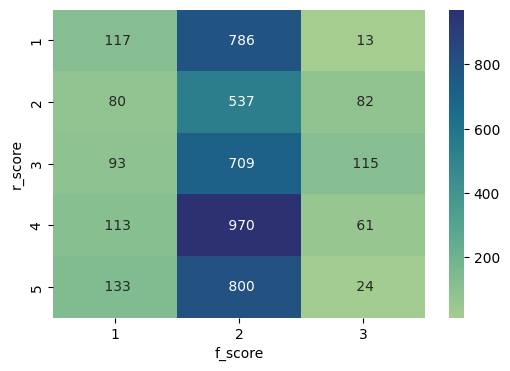

In [111]:
plt.figure(figsize = (6,4))
sns.heatmap(hm1, annot=True, cmap="crest", fmt=" .0f")

r_score - m_score

In [112]:
hm2 = df_rfm.groupby(['r_score', 'm_score']) \
    .agg({'f_score': 'count'}) \
    .reset_index() \
    .pivot(index='r_score', columns='m_score', values='f_score')

<AxesSubplot: xlabel='m_score', ylabel='r_score'>

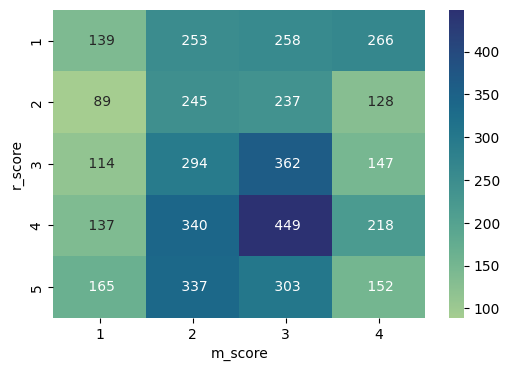

In [113]:
plt.figure(figsize = (6, 4))
sns.heatmap(hm2, annot=True, cmap="crest", fmt=" .0f")

f_score - m_score, это самая интересная взаимосвязь

In [114]:
hm3 = df_rfm.groupby(['f_score', 'm_score']) \
    .agg({'r_score': 'count'}) \
    .reset_index() \
    .pivot(index='f_score', columns='m_score', values='r_score')

<AxesSubplot: xlabel='m_score', ylabel='f_score'>

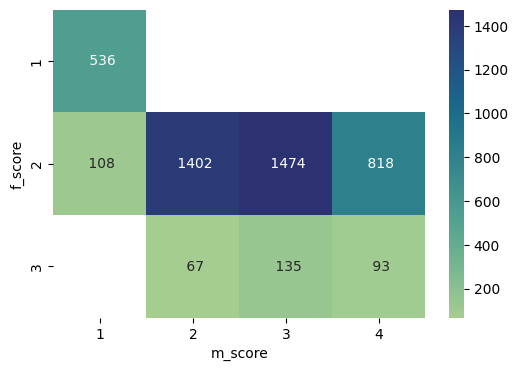

In [115]:
plt.figure(figsize = (6, 4))
sns.heatmap(hm3, annot=True, cmap="crest", fmt=" .0f")

### Сегментация

Если не учитывать параметр r_score, у него очень маленький разброс и он несет мало ценной информации,<br> 
то можно выделить такие сегменты студентов:<br>
<br>
1. неуспевающие (двоечники) - х1х<br>
<br>
2. типичные студенты (1 курс, средний балл) - х22, (х21)<br>
<br>
3. хорошисты (1 курс, хороший балл) - х23<br>
<br>
4. отличники (1 курс, отличный балл) - х24<br>
<br>
5. результативные (сдали 2 курса со средним баллом) - х32<br>
<br>
6. результативные хорошисты (сдали 2 курса с хорошим баллом) - х33<br>
<br>
7. результативные отличники (сдали 2 курса с отличным баллом) - х34<br>
<br>
остается ещё х21, курс они сдали, но не с перврого раза, поэтому средний балл низкий, они старались, отнесем их к типичным студентам.<br>

функция для определения категории студента по номеру сегментаь

In [119]:
def func_rfm(x):
    d = { r'.1.'     : '1. Двоечник',
          r'.22|.21' : '2. типичный студент',
          r'.23'     : '3. Хорошист',
          r'.24'     : '4. Отличник',
          r'.32'     : '5. Результативный',
          r'.33'     : '6. Результативный хорошист',
          r'.34'     : '7. Результативный отличник'}
    for key, value in d.items():
        if re.fullmatch(key, str(x)):
            return value

Итоговое разбиение

In [120]:
df_rfm['category'] = df_rfm.rfm_score.apply(func_rfm)

In [121]:
df_rfm.groupby('category') \
    .agg({'id_student': 'nunique'}) \
    .rename(columns={'id_student': 'count'}) \
    .sort_values('category') \
    .reset_index()

,category,count
0,1. Двоечник,536
1,2. типичный студент,1510
2,3. Хорошист,1474
3,4. Отличник,818
4,5. Результативный,67
5,6. Результативный хорошист,135
6,7. Результативный отличник,93


добавив нашу RFM сегментацию в дата фрэйм df_stex сможем смотреть сегментацию в разрезе например предметов:

In [122]:
df_stex = df_stex.merge(df_rfm[['id_student', 'category']], on='id_student')

In [123]:
print('RFM сегментация по предметам')
rfm_ccc = df_stex.query('code_module == "CCC"') \
    .groupby('category') \
    .agg({'id_student': 'nunique'}) \
    .reset_index() \
    .rename(columns={'id_student': 'CCC'})
rfm_ddd = df_stex.query('code_module == "DDD"') \
    .groupby('category') \
    .agg({'id_student': 'nunique'}) \
    .reset_index() \
    .rename(columns={'id_student': 'DDD'})
rfm_ccc.merge(rfm_ddd, on='category')

RFM сегментация по предметам


,category,CCC,DDD
0,1. Двоечник,204,334
1,2. типичный студент,470,1068
2,3. Хорошист,468,1006
3,4. Отличник,481,337
4,5. Результативный,64,67
5,6. Результативный хорошист,135,135
6,7. Результативный отличник,93,93


или по семестрам:

In [124]:
print('RFM сегментация по семестрам')
rfm_2013b = df_stex.query('code_presentation == "2013B"') \
    .groupby('category') \
    .agg({'id_student': 'nunique'}) \
    .rename(columns={'id_student': '2013B'})
rfm_2013j = df_stex.query('code_presentation == "2013J"') \
    .groupby('category') \
    .agg({'id_student': 'nunique'}) \
    .rename(columns={'id_student': '2013J'})
rfm_2014b = df_stex.query('code_presentation == "2014B"') \
    .groupby('category') \
    .agg({'id_student': 'nunique'}) \
    .rename(columns={'id_student': '2014B'})
rfm_2014j = df_stex.query('code_presentation == "2014J"') \
    .groupby('category') \
    .agg({'id_student': 'nunique'}) \
    .rename(columns={'id_student': '2014J'})

rfm_on_sem = rfm_2013b.merge(rfm_2013j, on='category') \
    .merge(rfm_2014b, on='category') \
    .merge(rfm_2014j, on='category') 
rfm_on_sem

RFM сегментация по семестрам


,2013B,2013J,2014B,2014J
category,,,,
1. Двоечник,98,90,112,239
2. типичный студент,272,305,311,646
3. Хорошист,165,339,409,561
4. Отличник,23,95,283,417
5. Результативный,15,29,32,42
6. Результативный хорошист,22,66,68,95
7. Результативный отличник,7,44,46,68


построим график по этим данным, изменение сегментов по времение(семестрам)

In [125]:
rfm_on_sem.T

category,1. Двоечник,2. типичный студент,3. Хорошист,4. Отличник,5. Результативный,6. Результативный хорошист,7. Результативный отличник
2013B,98,272,165,23,15,22,7
2013J,90,305,339,95,29,66,44
2014B,112,311,409,283,32,68,46
2014J,239,646,561,417,42,95,68


<AxesSubplot: >

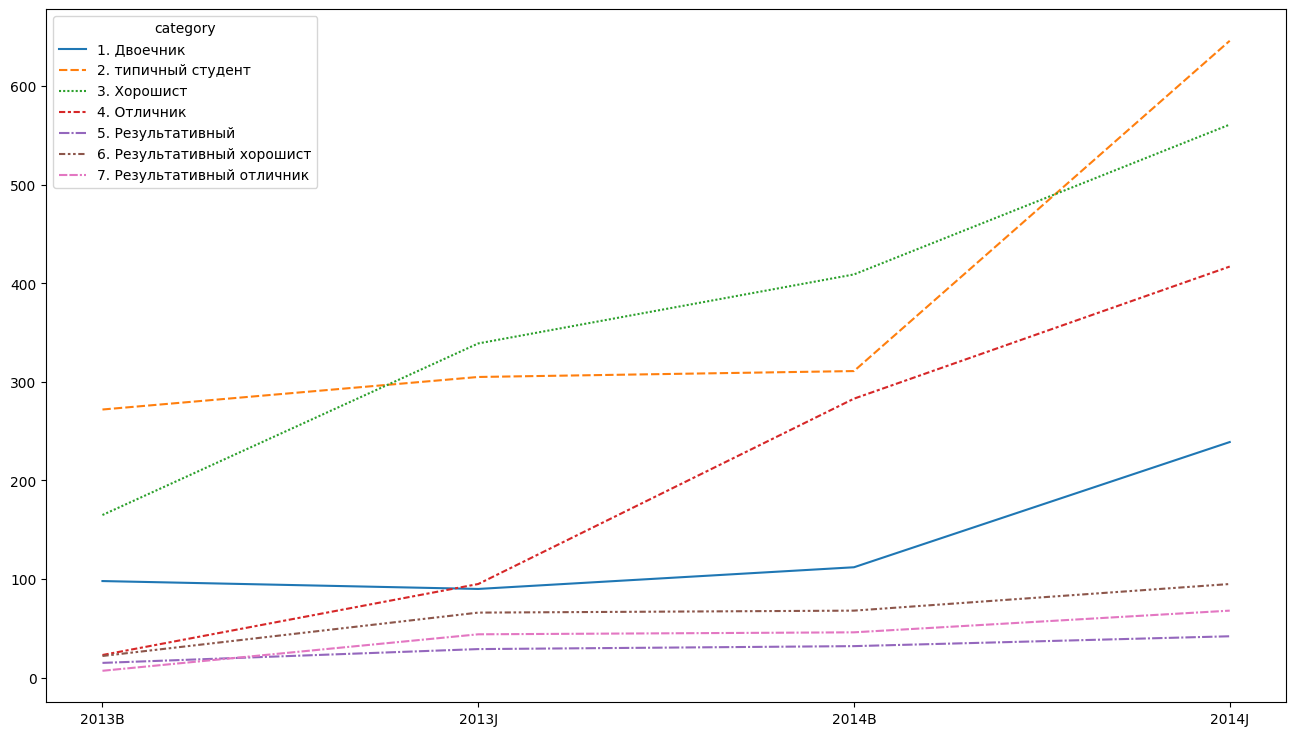

In [126]:
plt.figure(figsize = (16,9))
sns.lineplot(data=rfm_on_sem.T)